# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

• Salary: Applicant with high income should have more chances of loan approval.

• Previous History: Applicant who have repaid their previous debts should have higher chances of loan approval.

• Loan Amount: Loan Approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

• Loan Term: Loan for less time and less amount should have higher chances of approval.

• Property Area: Properties in urban areas have higher growth perspectives and increment in valuation of the property.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

#for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("D:\Desktop Files\Compass LHL\Git Clone Data\Deployment-Project\data\data.csv") 
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.isnull().sum()
df.dropna(subset=['Dependents', 'Self_Employed'], inplace=True)

In [6]:
df["Gender"].value_counts()

Male      453
Female    101
Name: Gender, dtype: int64

In [7]:
df["Loan_Amount_Term"].value_counts()

360.0    475
180.0     39
300.0     13
480.0     13
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [8]:
df["Credit_History"].value_counts()

1.0    440
0.0     83
Name: Credit_History, dtype: int64

In [9]:
#droping the "Loan_ID" variable as it do not have any effect on predictions.
df.drop("Loan_ID",axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Look at some basic statistics for numerical variables.

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,567.000000,567.000000,548.000000,555.000000,523.000000
mean,5383.222222,1582.827019,146.427007,341.945946,0.841300
std,5821.061726,2507.964668,85.772669,65.108329,0.365746
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2853.000000,0.000000,100.000000,360.000000,1.000000
50%,3833.000000,1167.000000,128.000000,360.000000,1.000000
75%,5825.000000,2279.000000,170.500000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


Text(0.5, 1.0, 'Distribution for Applicant Income')

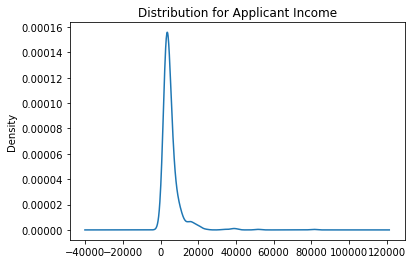

In [11]:
df['ApplicantIncome'].plot(kind='kde')
plt.title("Distribution for Applicant Income")

Text(0.5, 1.0, 'Distribution(hist) for Co-Applicant Income')

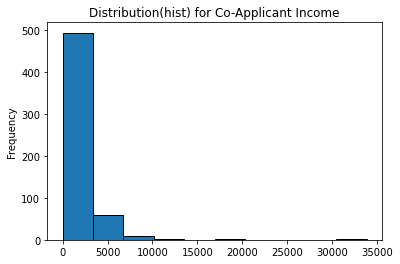

In [12]:
df['CoapplicantIncome'].plot(kind='hist', edgecolor='black')
plt.title("Distribution(hist) for Co-Applicant Income")

Text(0.5, 1.0, 'Distribution for Co-Applicant Income')

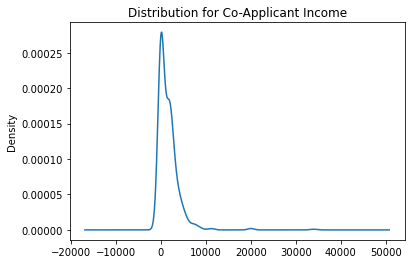

In [13]:
df['CoapplicantIncome'].plot(kind='kde')
plt.title("Distribution for Co-Applicant Income")

Text(0.5, 1.0, 'Outlier Detection for Applicant Income')

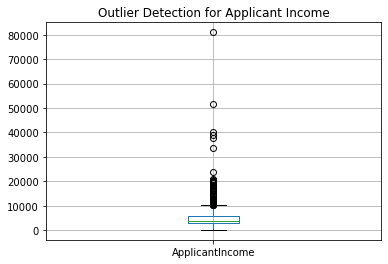

In [14]:
df.boxplot("ApplicantIncome")
plt.title("Outlier Detection for Applicant Income")

Text(0.5, 1.0, 'Outlier Detection for Co-Applicant Income')

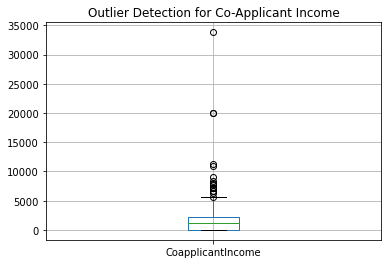

In [15]:
df.boxplot("CoapplicantIncome")
plt.title("Outlier Detection for Co-Applicant Income")

In [17]:
for x in ['ApplicantIncome']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

df.isnull().sum()
#df = df.dropna(axis = 0)
#df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome      47
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
for x in ['CoapplicantIncome']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

df.isnull().sum()
df = df.dropna(axis = 0)
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [16]:
 df.describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,554,567,567,567,567,567,567
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,453,372,326,443,487,217,390


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

Text(0.5, 1.0, 'Property Area')

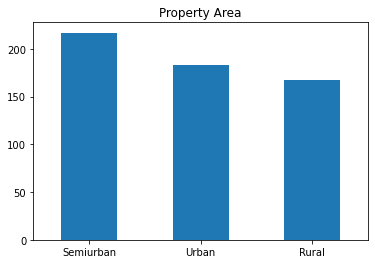

In [18]:
df['Property_Area'].value_counts().plot.bar(rot=0)
plt.title("Property Area")

In [19]:
round((df['Property_Area'].value_counts()/df['Property_Area'].value_counts().sum())*100,1)

Semiurban    38.3
Urban        32.3
Rural        29.5
Name: Property_Area, dtype: float64

Text(0.5, 1.0, 'Loan Status')

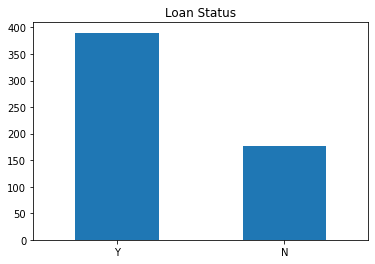

In [20]:
df['Loan_Status'].value_counts().plot.bar(rot=0)
plt.title("Loan Status")

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

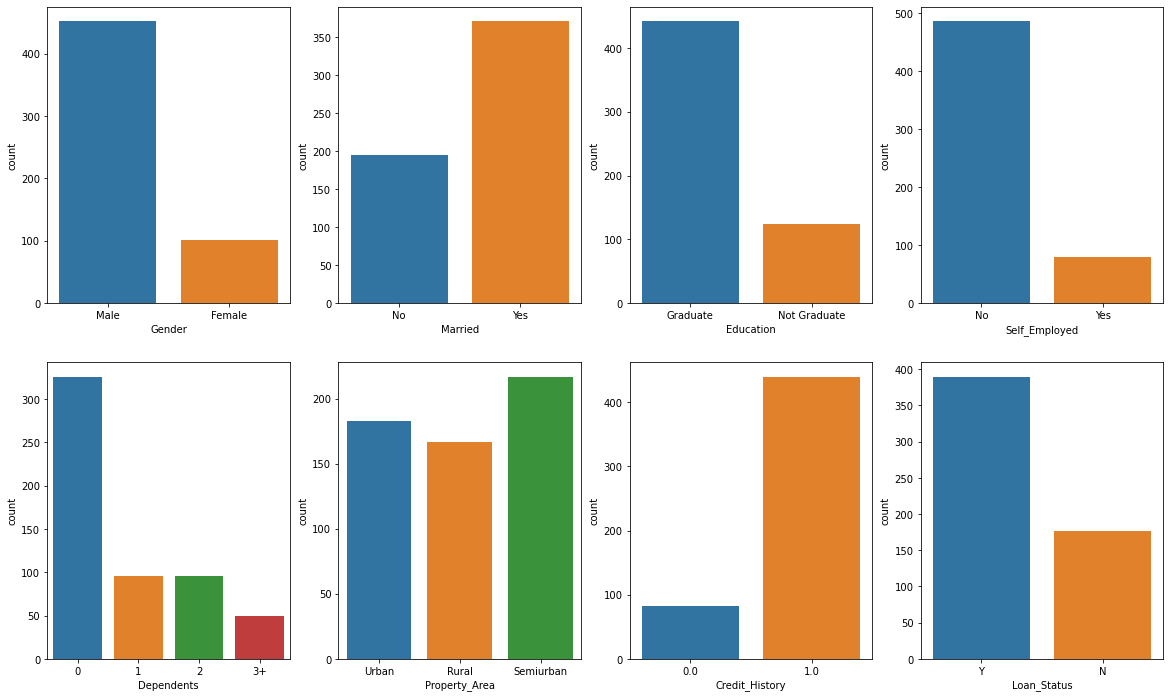

In [23]:
fig,ax = plt.subplots(2,4,figsize=(20,12))
sns.countplot('Gender',data=df,ax=ax[0][0])
sns.countplot('Married',data=df,ax=ax[0][1])
sns.countplot('Education',data=df,ax=ax[0][2])
sns.countplot('Self_Employed',data=df,ax=ax[0][3])
sns.countplot('Dependents',data=df,ax=ax[1][0])
sns.countplot('Property_Area',data=df,ax=ax[1][1])
sns.countplot('Credit_History',data=df,ax=ax[1][2])
sns.countplot('Loan_Status',data=df,ax=ax[1][3])

# Just for basic univariate analysis. Not leading to any bias for model deployment.

Loan_Status    N    Y
Married              
No            73  122
Yes          104  268


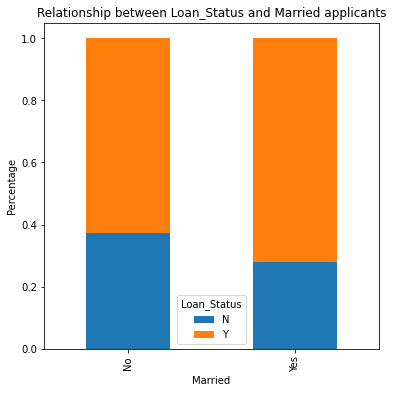

In [24]:
# Relationship between Loan_Status and Married applicants
print(pd.crosstab(df["Married"],df["Loan_Status"]))
Married=pd.crosstab(df["Married"],df["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.title("Relationship between Loan_Status and Married applicants")
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

#It shows that the married people prefer to take home loans as the proportion for them is higher than non-married.

Loan_Status      N    Y
Self_Employed          
No             152  335
Yes             25   55


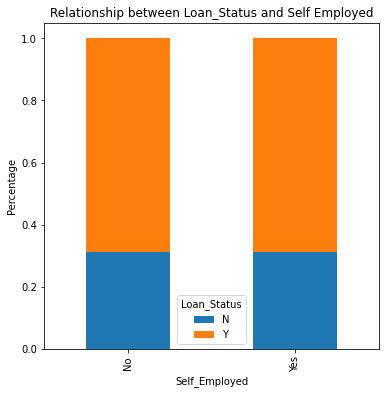

In [25]:
# Relationship between Loan_Status and Self Employed
print(pd.crosstab(df["Self_Employed"],df["Loan_Status"]))
SelfEmployed = pd.crosstab(df["Self_Employed"],df["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.title("Relationship between Loan_Status and Self Employed")
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

#We cant infer much from the relationship of Self Employed people and their Loan Status


<AxesSubplot:>

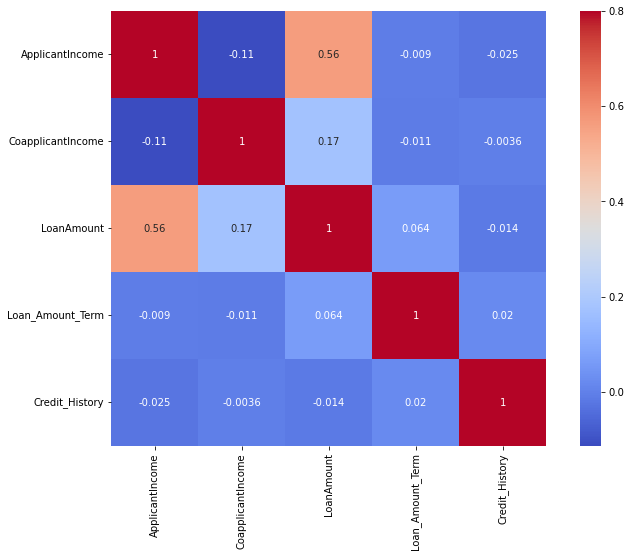

In [26]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(matrix, vmax=.8, square=True, cmap='coolwarm',annot=True)

In [27]:
df.groupby(['Married', 'Gender']).mean()['LoanAmount']

Married  Gender
No       Female    112.228571
         Male      135.250000
Yes      Female    155.724138
         Male      154.593750
Name: LoanAmount, dtype: float64

In [28]:
df.groupby('Loan_Status').mean()['CoapplicantIncome']

Loan_Status
N    1721.587571
Y    1519.851077
Name: CoapplicantIncome, dtype: float64

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



Text(0.5, 1.0, 'kde distribution of Applicant Income Bin-10')

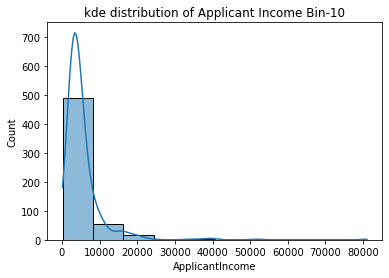

In [30]:
sns.histplot(data=df['ApplicantIncome'],bins=10,kde=True)
plt.title("kde distribution of Applicant Income Bin-10")

Text(0.5, 1.0, 'kde distribution of Applicant Income Bin-30')

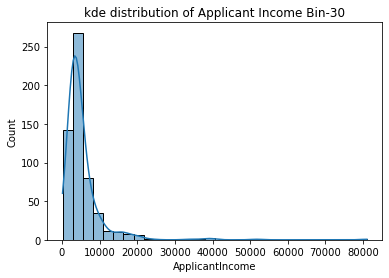

In [31]:
sns.histplot(data=df['ApplicantIncome'],bins=30,kde=True)
plt.title("kde distribution of Applicant Income Bin-30")


Look at box plots to understand the distributions. 

Text(0.5, 1.0, 'Boxplot Dist.in Applicant Income')

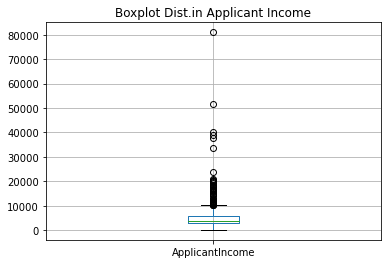

In [32]:
df.boxplot("ApplicantIncome") 
plt.title("Boxplot Dist.in Applicant Income")

Look at the distribution of income segregated  by `Education`

Text(0.5, 1.0, 'Distribution of Education Bin 10')

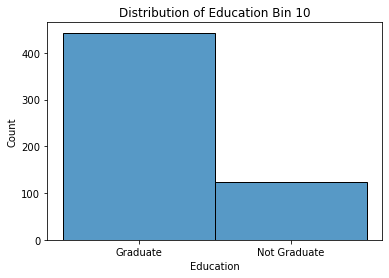

In [43]:
sns.histplot(data=df['Education'],bins=10)
plt.title("Distribution of Education Bin 10")

Look at the histogram and boxplot of LoanAmount

Text(0.5, 1.0, 'Loan Amount')

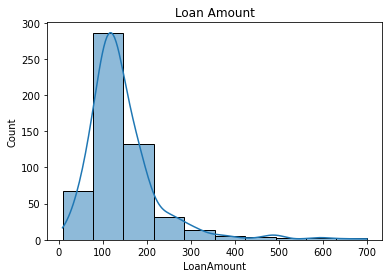

In [41]:
sns.histplot(data=df['LoanAmount'],bins=10,kde=True)
plt.title("Loan Amount")

Text(0.5, 1.0, 'Box plot for Loan Amount')

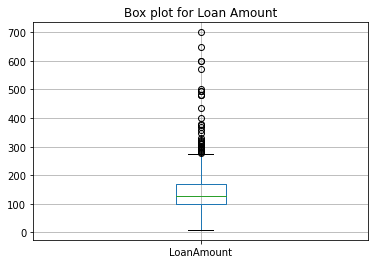

In [42]:
df.boxplot("LoanAmount")
plt.title("Box plot for Loan Amount")

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [65]:
category_table = df[["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]]
category_table

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural
610,Male,Yes,3+,Graduate,No,Rural
611,Male,Yes,1,Graduate,No,Urban
612,Male,Yes,2,Graduate,No,Urban


In [66]:
vis_df = category_table.pivot_table(index="Gender",columns = ["Education","Married"], values = "Property_Area",aggfunc="count")
vis_df

Education Graduate      Not Graduate    
Married         No  Yes           No Yes
Gender                                  
Female          59   24           13   5
Male            91  257           29  76

<AxesSubplot:xlabel='Gender'>

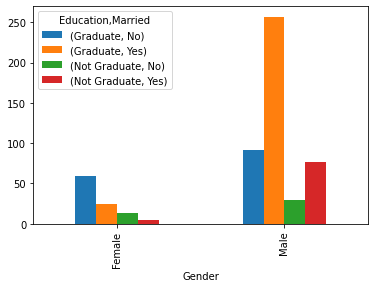

In [67]:
vis_df.plot(kind='bar',figsize=(6,4))

In [69]:
vis_df1 = category_table.pivot_table(index="Education",columns = ["Gender","Self_Employed"], values = "Property_Area",aggfunc="count")
vis_df1

Gender        Female     Male    
Self_Employed     No Yes   No Yes
Education                        
Graduate          72  11  299  49
Not Graduate      14   4   93  12

<AxesSubplot:xlabel='Education'>

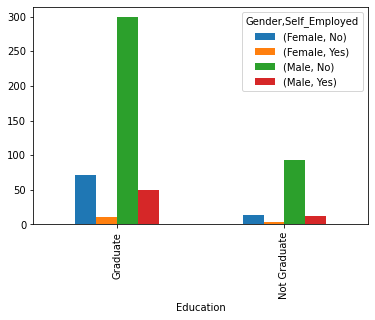

In [70]:
vis_df1.plot(kind='bar',figsize=(6,4))

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [71]:
df.isnull().sum()

Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     12
Credit_History       44
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
df['Gender'].fillna((df['Gender'].mode()[0]), inplace=True)
df['Loan_Amount_Term'].fillna((df['Loan_Amount_Term'].mode()[0]), inplace=True)
df['Credit_History'].fillna(int(df['Credit_History'].mean()), inplace=True)

In [73]:
df['Dependents'].replace('3+',3,inplace=True)

In [74]:
#Replacing 0's with null values in loan amount 
df.LoanAmount.replace(0, np.nan, inplace=True)

#Imputing null values in loan amount with the median
df.LoanAmount.fillna(value=df.LoanAmount.median(), inplace=True)
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

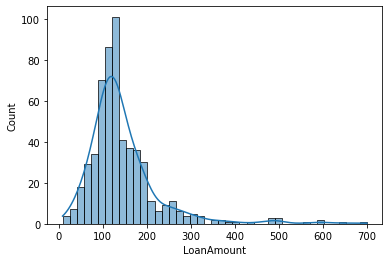

In [75]:
# Before the Log to check distribution and extreme values
sns.histplot(data=df['LoanAmount'],kde=True)

In [76]:
# Natural Log
df['LoanAmount_log'] = np.log(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Count'>

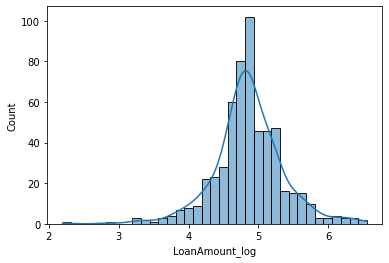

In [77]:
## After the Log to check distribution and values
sns.histplot(data=df['LoanAmount_log'],kde=True)

### Feature Engineering:

Combine both incomes as total income and take a log transformation of the same.

In [78]:
#Adding the applicant and co-applicant income to get the total income per application
df['Total_Income']=df['ApplicantIncome'] + df['CoapplicantIncome']

In [79]:
df['Total_Income_log'] = np.log(df['Total_Income'])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,5849.0,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664


In [80]:
#LoanAmount_per_totalincome
df["LoanAmount_per_Total_Income"] = round((df["LoanAmount"]/df["Total_Income"])*100,3)

In [81]:
#Property_Area_per_Loan_amount_per_TotalIncome
df["Property_Area_per_Loan_amount_per_Total_Income"] = df.groupby(["Property_Area"])["LoanAmount_per_Total_Income"].transform("mean")

In [82]:
#LoanAmount as per the number of dependents of applicants
df["Dependents_per_LoanAmount"] = df.groupby(["Dependents"])["LoanAmount"].transform("sum")
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,LoanAmount_per_Total_Income,Property_Area_per_Loan_amount_per_Total_Income,Dependents_per_LoanAmount
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,5849.0,8.674026,2.188,2.319590,43737.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,2.101,2.403168,15205.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,2.200,2.319590,43737.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,2.429,2.319590,43737.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,2.350,2.319590,43737.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466,2.448,2.403168,43737.0
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205,0.974,2.403168,9150.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456,3.044,2.319590,15205.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664,2.466,2.319590,14582.0


In [83]:
#EMI = Monthly amount to be paid by the applicant to repay the loan. 
#Higher the EMI’s difficult it will be to pay back the loan.
df["EMI"] = round(df["LoanAmount"]/df["Loan_Amount_Term"]*100,2)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,LoanAmount_per_Total_Income,Property_Area_per_Loan_amount_per_Total_Income,Dependents_per_LoanAmount,EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,5849.0,8.674026,2.188,2.319590,43737.0,35.56
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,2.101,2.403168,15205.0,35.56
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,2.200,2.319590,43737.0,18.33
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,2.429,2.319590,43737.0,33.33
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,2.350,2.319590,43737.0,39.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466,2.448,2.403168,43737.0,19.72
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205,0.974,2.403168,9150.0,22.22
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456,3.044,2.319590,15205.0,70.28
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664,2.466,2.319590,14582.0,51.94


## 4. Building a Predictive Model

In [84]:
# Transform dataset to Train and Test data
X=df.drop("Loan_Status",1)
X.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income,Total_Income_log,LoanAmount_per_Total_Income,Property_Area_per_Loan_amount_per_Total_Income,Dependents_per_LoanAmount,EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030,5849.0,8.674026,2.188,2.319590,43737.0,35.56
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030,6091.0,8.714568,2.101,2.403168,15205.0,35.56
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655,3000.0,8.006368,2.200,2.319590,43737.0,18.33
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492,4941.0,8.505323,2.429,2.319590,43737.0,33.33
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760,6000.0,8.699515,2.350,2.319590,43737.0,39.17
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,5.587249,9613.0,9.170872,2.777,2.319590,14582.0,74.17
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,4.553877,3849.0,8.255569,2.468,2.319590,43737.0,26.39
7,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,5.062595,5540.0,8.619750,2.852,2.437613,9150.0,43.89
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,5.123964,5532.0,8.618305,3.037,2.319590,14582.0,46.67
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,5.855072,23809.0,10.077819,1.466,2.437613,15205.0,96.94


In [85]:
y=df[["Loan_Status"]]
y.head(10)

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
5,Y
6,Y
7,N
8,Y
9,N


In [86]:
#Creating dummy variables 
#drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X,drop_first=True)
X.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Total_Income,Total_Income_log,LoanAmount_per_Total_Income,Property_Area_per_Loan_amount_per_Total_Income,...,EMI,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,5849.0,8.674026,2.188,2.319590,...,35.56,1,0,1,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,6091.0,8.714568,2.101,2.403168,...,35.56,1,1,0,1,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,3000.0,8.006368,2.200,2.319590,...,18.33,1,1,1,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,4941.0,8.505323,2.429,2.319590,...,33.33,1,1,1,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,6000.0,8.699515,2.350,2.319590,...,39.17,1,0,1,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,5.587249,9613.0,9.170872,2.777,2.319590,...,74.17,1,1,0,0,1,0,1,0,1
6,2333,1516.0,95.0,360.0,1.0,4.553877,3849.0,8.255569,2.468,2.319590,...,26.39,1,1,1,0,0,1,0,0,1
7,3036,2504.0,158.0,360.0,0.0,5.062595,5540.0,8.619750,2.852,2.437613,...,43.89,1,1,0,0,0,0,0,1,0
8,4006,1526.0,168.0,360.0,1.0,5.123964,5532.0,8.618305,3.037,2.319590,...,46.67,1,1,0,0,1,0,0,0,1
9,12841,10968.0,349.0,360.0,1.0,5.855072,23809.0,10.077819,1.466,2.437613,...,96.94,1,1,0,1,0,0,0,1,0


In [87]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=1)

Logistic Regression

In [88]:
X_train1 = X_train
y_train1 = y_train
X_test1  = X_test
y_test1 = y_test
scaler = StandardScaler()
scaler.fit(X_train1)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.44467273,  0.31808247, -0.49182367, ..., -0.38448158,
        -0.78506467,  1.44697961],
       [-0.32680359,  0.5808408 ,  0.34630717, ..., -0.38448158,
        -0.78506467,  1.44697961],
       [-0.3720375 , -0.19234508, -0.11527213, ..., -0.38448158,
        -0.78506467,  1.44697961],
       ...,
       [-0.91571433,  0.81654282, -0.41894273, ...,  2.60090482,
        -0.78506467,  1.44697961],
       [ 2.40071431, -0.75584462,  0.57709683, ...,  2.60090482,
        -0.78506467,  1.44697961],
       [-0.61125531, -0.75584462, -0.84408156, ..., -0.38448158,
        -0.78506467,  1.44697961]])

In [89]:
logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(X_train1, y_train1)

LogisticRegression(random_state=1)

In [90]:
predict_test_logistic=logistic_model.predict(X_test1)
logistic_score = round(accuracy_score(predict_test_logistic,y_test1)*100,1)
print(f'Logistic_score: {logistic_score}')

Logistic_score: 68.4


In [91]:
# predict the target on the test dataset
predict_test = logistic_model.predict(X_test1)
print('Target on test data',predict_test)

Target on test data ['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']


Decision Tree

In [92]:
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [93]:
predict_test_tree=tree_model.predict(X_test)
tree_score = round(accuracy_score(predict_test_tree,y_test)*100,1)
print(f'Tree_score: {tree_score}')

Tree_score: 62.0


In [94]:
# predict the target on the test dataset
pred_test_tree = tree_model.predict(X_test)
print('Target on test data',predict_test)

Target on test data ['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']


Random Forest Classifier

In [95]:
Model_forest = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
Model_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [96]:
predict_test_forest= Model_forest.predict(X_test)
Forest_score = round(accuracy_score(predict_test_forest,y_test)*100,1)
print(f'Forest_Score: {Forest_score}')

Forest_Score: 71.3


In [97]:
# predict the target on the test dataset
predict_test = Model_forest.predict(X_test)
print('Target on test data',predict_test)

Target on test data ['Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y']


Try paramater grid search to improve the results

Random Forest with Grid Search

In [98]:
# max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in model
#range for max_depth from 1 to 20 with interval of 2 and same for n-estimators
paramgrid = {'max_depth': list(range(1,32,2)),'n_estimators':list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

grid_search.fit(X_train,y_train)

grid_search.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=81, random_state=1)

In [99]:
grid_forest_model = RandomForestClassifier(random_state=1,max_depth=7,n_estimators=81)
grid_forest_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=81, random_state=1)

In [100]:
predict_grid_forest = grid_forest_model.predict(X_test)
Grid_score = round(accuracy_score(predict_grid_forest,y_test)*100,1)
print(f'Grid_Score: {Grid_score}')

Grid_Score: 70.8


Decision Tree with Grid Search

In [101]:
# Choose the type of classifier 
paramgrid = {'max_depth': list(range(1,20,2)),'criterion': ['gini', 'entropy']}
decision_tree_tuned = GridSearchCV(DecisionTreeClassifier(random_state=1),paramgrid)


decision_tree_tuned.fit(X_train, y_train)
decision_tree_tuned.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [102]:
decision_tree_tuned1 = DecisionTreeClassifier(random_state=1,max_depth=3)
decision_tree_tuned1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [103]:
predict_grid_decision = decision_tree_tuned1.predict(X_test)
Grid_score = round(accuracy_score(predict_grid_decision,y_test)*100,1)
print(f'Grid_Score: {Grid_score}')

Grid_Score: 78.4


In [104]:
import pickle as pkl
# save the model to disk
filename = 'logistic_model.pkl'
pkl.dump(logistic_model, open(filename, 'wb')) # wb means write as binary

# load the model from disk
loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
result = round(loaded_model.score(X_test, y_test)*100,1)
print(f'Result_Accuracy_Score: {result}')

Result_Accuracy_Score: 68.4


In [105]:
# save the model to disk
filename = 'tree_model.pkl'
pkl.dump(tree_model, open(filename, 'wb')) # wb means write as binary

# load the model from disk
loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
result = round(loaded_model.score(X_test, y_test)*100,1)
print(f'Result_Accuracy_Score: {result}')

Result_Accuracy_Score: 62.0


In [106]:
filename = 'Model_forest.pkl'
pkl.dump(Model_forest, open(filename, 'wb')) # wb means write as binary

# load the model from disk
loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
result = round(loaded_model.score(X_test, y_test)*100,1)
print(f'Result_Accuracy_Score: {result}')

Result_Accuracy_Score: 71.3


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [107]:
from sklearn.pipeline import Pipeline

# list of (name, sklearn transformation class) tuples. Implementing .fit and .transform methods
# last step must be an estimator.
pipeline1 = Pipeline(steps=[('scaling', StandardScaler()),
                           ('classifier', LogisticRegression())])
pipeline1.fit(X_train1, y_train1)

y_pred = pipeline1.predict(X_test1)
acc = round(accuracy_score(y_test1, y_pred)*100,1)
print(f'Test set accuracy: {acc}')

Test set accuracy: 78.4


In [108]:
from sklearn.pipeline import Pipeline

# list of (name, sklearn transformation class) tuples. Implementing .fit and .transform methods
# last step must be an estimator.
pipeline = Pipeline([('classifier', RandomForestClassifier(random_state = 42))])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
acc = round(accuracy_score(y_test, y_pred)*100,1)
print(f'Test set accuracy: {acc}')

Test set accuracy: 69.6


In [109]:
from sklearn.pipeline import Pipeline

# list of (name, sklearn transformation class) tuples. Implementing .fit and .transform methods
# last step must be an estimator.
pipeline2 = Pipeline([('classifier', DecisionTreeClassifier(random_state = 42))])
pipeline2.fit(X_train, y_train)

y_pred = pipeline2.predict(X_test)
acc = round(accuracy_score(y_test, y_pred)*100,1)
print(f'Test set accuracy: {acc}')

Test set accuracy: 66.1


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [110]:
# saving the model
import pickle

# saving the columns
model_columns = list(X.columns)
with open('model_columns.pkl','wb') as file:
    pickle.dump(model_columns, file)
    
    
pickle.dump(pipeline, open('pipeline.pkl', 'wb'))

Flask - code for app.py file

In [ ]:
from flask import render_template, request, jsonify,Flask
import flask
import traceback #allows you to send error to user

# App definition
app = Flask(__name__)

# importing models
with open('pipeline.pkl', 'rb') as f:
   regressor = pickle.load (f)

with open('model_columns.pkl', 'rb') as f:
   model_columns = pickle.load (f)

#webpage

@app.route('/')
def welcome():
   return "Welcome! Use this Flask App for Boston Housing Price Prediction"

@app.route('/predict', methods=['POST','GET'])
def predict():

   if flask.request.method == 'GET':
       return "Prediction page. Try using post with params to get specific prediction."

   if flask.request.method == 'POST':
       try:
           json_ = request.json # '_' since 'json' is a special word
           print(json_)
           query_ = pd.get_dummies(pd.DataFrame(json_))
           query = query_.reindex(columns = model_columns, fill_value= 0)
           prediction = list(regressor.predict(query))

           return jsonify({
               "prediction":str(prediction)
           })

       except:
           return jsonify({
               "trace": traceback.format_exc()
               })



if __name__ == "__main__":
   app.run()